In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
pd.set_option('display.max_columns', None)

notebook_dir = os.getcwd()
os.chdir(notebook_dir);
print(notebook_dir)

/Users/franri/Documents/GitHub/Tesis


In [12]:
df = pd.read_excel("./Input/PATIENTS.xls")
df.head()

,Nº I.C.,FECHA RECEPCION,R.U.T.,NOMBRE DEL PACIENTE,SEXO,EDAD (AÑOS),TELEFONO,CELULAR,DIRECCION,COMUNA,"DESCRIPCION DE, DIAGNOSTICO",ESTABLECIMIENTO DE ORIGEN,ESTABLECIMIENTO DESTINO,POLICLINICO DE DESTINO,ESTADO,AUGE,T.E. FECHA RECEPCION,NSP,NSA,MOTIVO_IC,RUT_PROFESIONAL,NOMBRE_PROFESIONAL,ESPECIALIDAD,TIPO_IQ,PRESTACION,PRAIS,RNLE,N PAC,N PROF,N ESPEC
0,238666,1979,21688412-4,ELIZABETH ROMANEE CASTILLO SANCHEZ,FEMENINO,14,81315113,65644497,JOSE BUNSTER 1947 1947,ANGOL,COLELITIASIS / COLECISTECTOMIA LAPAROSCOPICA,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,345,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,7108401,IVAN SEPULVEDA NUÑEZ,CIRUGIA GENERAL,2,18-02-081,N,N,0,12.0,0
1,267723,1965,21450864-8,BRIAN ALEXANDER POBLETE VARELA,MASCULINO,15,34817400,56823861,LAS ENCINAS 49 VILLA TIJERAL 49,ANGOL,POLIPO VESICULAR DE BACINETE / COLECISTECTOMIA...,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,59,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,10789485,ANGEL RODRIGO PARADA HENRIQUEZ,CIRUGIA GENERAL,1,18-02-081,N,N,1,0.0,0
2,255701,1964,20977380-5,NADIA MALDONADO MEDINA,FEMENINO,16,75429174,93135802,PALACIO DE VERSALLES 1760 VILLA FRANCIA 1760,COLLIPULLI,COLELITIASIS / COLECISTECTOMIA VL,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,183,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,17345901,JAVIER VASQUEZ PEDRERO,CIRUGIA GENERAL,1,18-02-081,N,N,2,14.0,0
3,266606,1962,20977353-8,ROSA MARIA TERESA WILLSON SALDAÑA,FEMENINO,16,76669743,57830258,CARLOS CASANUEVA 403 403,COLLIPULLI,HERNIA INGUINAL IZQ / HERNIOPLASTIA,H. ANGOL,H. ANGOL,"HERNIA INGUINAL, CRURAL, UMBILICAL, DE LA LINE...",ACEPTADA,NO,70,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,18-02-003,N,N,3,15.0,0
4,271264,1961,21060611-4,CAMILA ANDREA ZAMBRANO DE LA HOZ,MASCULINO,16,54441068,33369356,MANZANARES S/N 0,RENAICO,ONICOCRIPTOSIS / ONICECTOMIA (CX MENOR),H. ANGOL,H. ANGOL,RESECCION O PLASTIA,ACEPTADA,NO,30,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,14-02-029,N,N,4,15.0,0


In [19]:
df = pd.read_excel("./Input/PATIENTS.xls")
df = df[["Nº I.C.", "FECHA RECEPCION", "NOMBRE DEL PACIENTE", "EDAD (AÑOS)", "COMUNA",
        "T.E. FECHA RECEPCION", "ESPECIALIDAD", "TIPO_IQ"]];
df.rename(columns={"Nº I.C.": "id", "FECHA RECEPCION": "fecha", "NOMBRE DEL PACIENTE": "nombre", "EDAD (AÑOS)": "edad",
                  "COMUNA": "comuna", "T.E. FECHA RECEPCION": "espera", "ESPECIALIDAD": "especialidad", "TIPO_IQ": "tipo"}, inplace=True);

# Calcular columna "prioridad"
df["prioridad"] = (1 + df["espera"] * df["edad"] * 0.0001).astype(int);

# Ordenar DataFrame por columna "prioridad" de menor a mayor
df_low = df.sort_values(by="prioridad", ascending=True);
df_high = df.sort_values(by="prioridad", ascending=False);
df_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 550 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            553 non-null    int64 
 1   fecha         553 non-null    int64 
 2   nombre        553 non-null    object
 3   edad          553 non-null    int64 
 4   comuna        553 non-null    object
 5   espera        553 non-null    int64 
 6   especialidad  553 non-null    object
 7   tipo          553 non-null    int64 
 8   prioridad     553 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 43.2+ KB


In [17]:

df_low.to_csv("./Input/LowPriority.csv", index=False);

df_high.to_csv("./Input/HighPriority.csv", index=False);

df_sample = df.sample(553, random_state=258);
df_sample.to_csv("./Input/AllPriority.csv", index=False);

print("Files created!");

Files created!


Estadísticas descriptivas para LowPriority.csv:
                  id        fecha       edad      espera        tipo  \
count     200.000000   200.000000  200.00000  200.000000  200.000000   
mean   254454.180000  1679.240000   22.32000  193.490000    1.295000   
std     17665.058135   340.261933   19.18693  175.949998    0.591374   
min    204022.000000   871.000000    0.00000    2.000000    1.000000   
25%    242468.000000  1441.500000    6.00000   51.000000    1.000000   
50%    260129.500000  1860.500000   17.00000  138.000000    1.000000   
75%    268566.500000  1935.250000   28.25000  312.250000    1.000000   
max    274662.000000  2037.000000   73.00000  717.000000    3.000000   

       prioridad  
count      200.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0  

Estadísticas descriptivas para HighPriority.csv:
                  id        fecha        edad      espera        tipo  \
count    

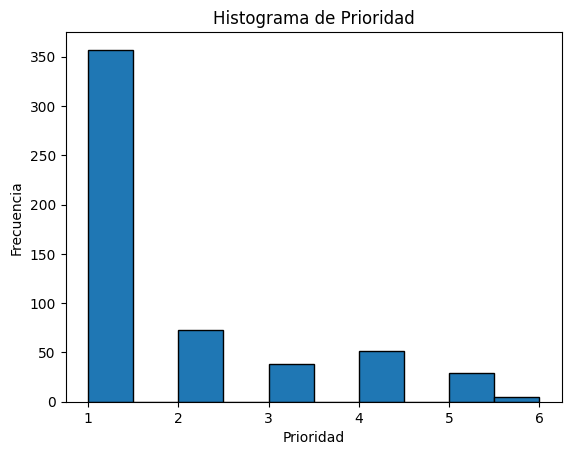

In [21]:
# Estadísticas descriptivas para los tres archivos
# Cargar los archivos nuevamente para generar estadísticas descriptivas
low_priority_df = pd.read_csv("./Input/LowPriority.csv").head(200);
high_priority_df = pd.read_csv("./Input/HighPriority.csv").head(200);
all_priority_df = pd.read_csv("./Input/AllPriority.csv").head(200);

# Generar estadísticas descriptivas
low_priority_stats = low_priority_df.describe();
high_priority_stats = high_priority_df.describe();
all_priority_stats = all_priority_df.describe();

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas para LowPriority.csv:");
print(low_priority_stats);
print("\nEstadísticas descriptivas para HighPriority.csv:");
print(high_priority_stats);
print("\nEstadísticas descriptivas para AllPriority.csv:");
print(all_priority_stats);

# Crear un histograma de la columna "prioridad"
plt.hist(df["prioridad"], bins=10, edgecolor="black");
plt.xlabel("Prioridad");
plt.ylabel("Frecuencia");
plt.title("Histograma de Prioridad");
plt.savefig("histograma_prioridad.png");
plt.show();

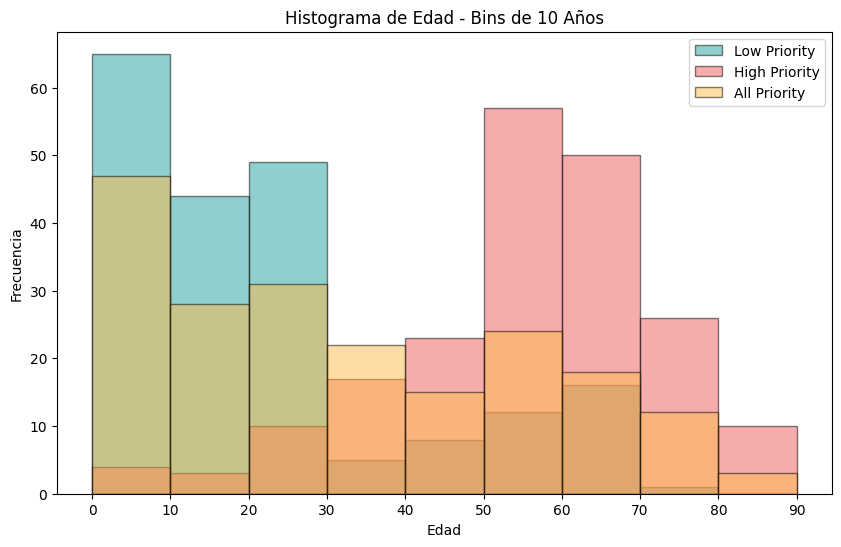

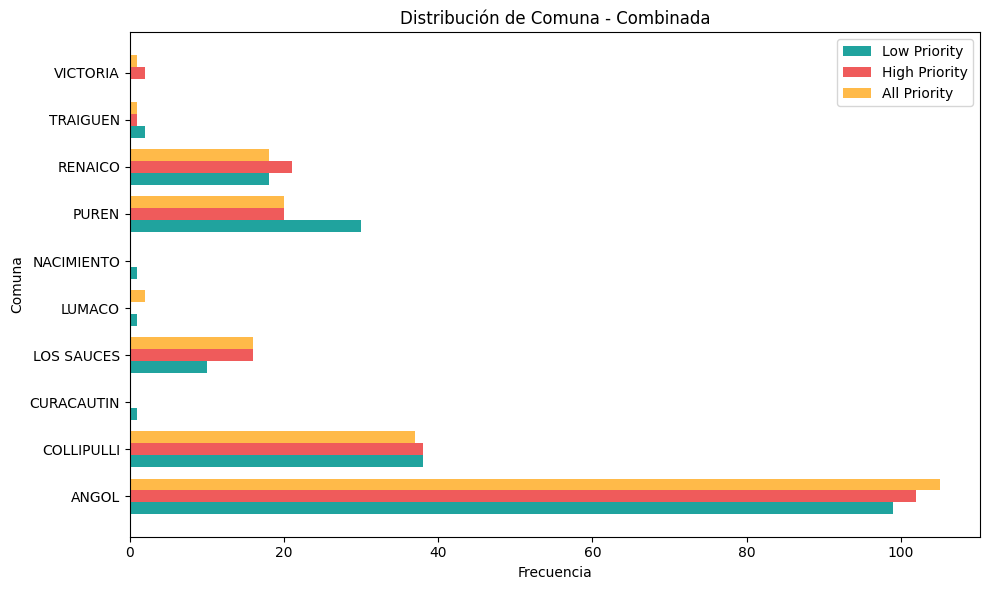

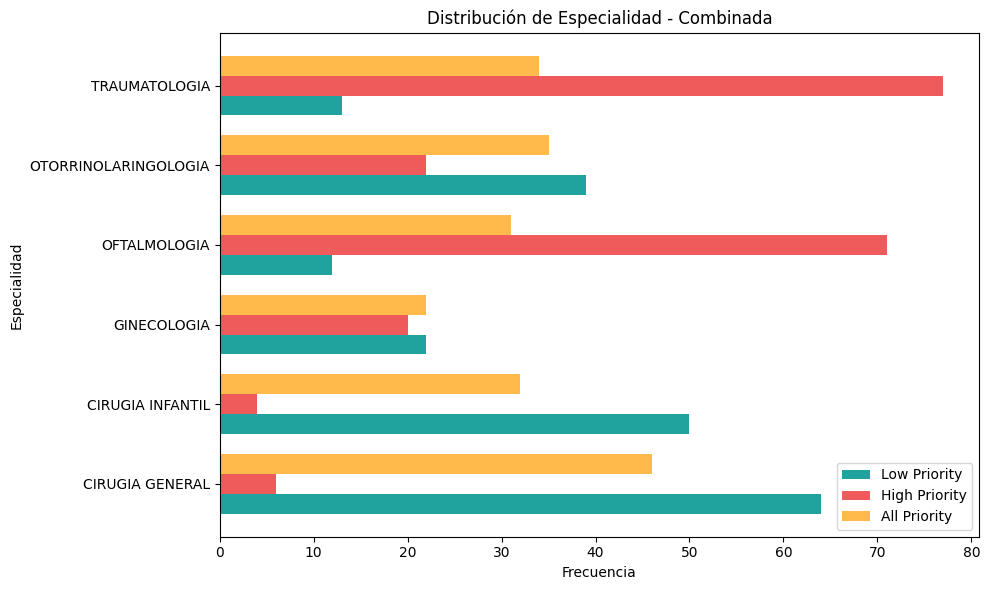

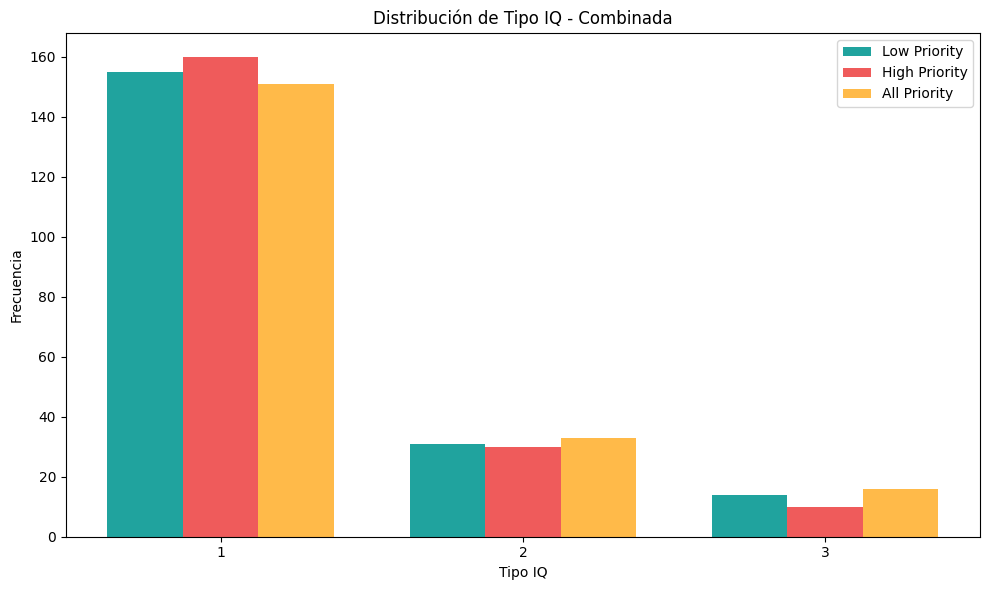

In [22]:
plt.figure(figsize=(10, 6))

# Determinar la edad mínima y máxima para crear bins de tamaño 10 años
min_age = min(low_priority_df["edad"].min(), high_priority_df["edad"].min(), all_priority_df["edad"].min())
max_age = max(low_priority_df["edad"].max(), high_priority_df["edad"].max(), all_priority_df["edad"].max())

# Crear bins de tamaño 10 años
bins = np.arange(min_age - (min_age % 10), max_age + (10 - max_age % 10) + 1, 10)

# Graficar histogramas con bins de tamaño 10 años
plt.hist(low_priority_df["edad"], bins=bins, alpha=0.5, label='Low Priority', color="#20a39e", edgecolor='black')
plt.hist(high_priority_df["edad"], bins=bins, alpha=0.5, label='High Priority', color="#ef5b5b", edgecolor='black')
plt.hist(all_priority_df["edad"], bins=bins, alpha=0.5, label='All Priority', color="#ffba49", edgecolor='black')

plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Edad - Bins de 10 Años")
plt.xticks(bins)
plt.legend()
plt.savefig("Combined_Edad_Histograma.png")
plt.show()

# Gráficos de Comuna
plt.figure(figsize=(10, 6))
comunas_low = low_priority_df["comuna"].value_counts().sort_index()
comunas_high = high_priority_df["comuna"].value_counts().sort_index()
comunas_all = all_priority_df["comuna"].value_counts().sort_index()

# Unir todos los índices
comunas_union = comunas_low.index.union(comunas_high.index).union(comunas_all.index)

# Reindexar las series de datos
comunas_low = comunas_low.reindex(comunas_union, fill_value=0)
comunas_high = comunas_high.reindex(comunas_union, fill_value=0)
comunas_all = comunas_all.reindex(comunas_union, fill_value=0)

# Definir y basado en el índice unificado
y = np.arange(len(comunas_union))
height = 0.25

plt.barh(y - height, comunas_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, comunas_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, comunas_all, height=height, color="#ffba49", label='All Priority')

plt.xlabel("Frecuencia")
plt.ylabel("Comuna")
plt.title("Distribución de Comuna - Combinada")
plt.yticks(y, comunas_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Comuna.png")
plt.show()

# Gráficos de Especialidad
plt.figure(figsize=(10, 6))
especialidad_low = low_priority_df["especialidad"].value_counts().sort_index()
especialidad_high = high_priority_df["especialidad"].value_counts().sort_index()
especialidad_all = all_priority_df["especialidad"].value_counts().sort_index()

# Unir todos los índices
especialidad_union = especialidad_low.index.union(especialidad_high.index).union(especialidad_all.index)

# Reindexar las series de datos
especialidad_low = especialidad_low.reindex(especialidad_union, fill_value=0)
especialidad_high = especialidad_high.reindex(especialidad_union, fill_value=0)
especialidad_all = especialidad_all.reindex(especialidad_union, fill_value=0)

# Definir y basado en el índice unificado
y = np.arange(len(especialidad_union))
height = 0.25

plt.barh(y - height, especialidad_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, especialidad_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, especialidad_all, height=height, color="#ffba49", label='All Priority')

plt.xlabel("Frecuencia")
plt.ylabel("Especialidad")
plt.title("Distribución de Especialidad - Combinada")
plt.yticks(y, especialidad_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Especialidad.png")
plt.show()

# Gráficos de Tipo IQ
plt.figure(figsize=(10, 6))
tipo_low = low_priority_df["tipo"].value_counts().sort_index()
tipo_high = high_priority_df["tipo"].value_counts().sort_index()
tipo_all = all_priority_df["tipo"].value_counts().sort_index()

# Unir todos los índices
tipo_union = tipo_low.index.union(tipo_high.index).union(tipo_all.index)

# Reindexar las series de datos
tipo_low = tipo_low.reindex(tipo_union, fill_value=0)
tipo_high = tipo_high.reindex(tipo_union, fill_value=0)
tipo_all = tipo_all.reindex(tipo_union, fill_value=0)

# Definir x basado en el índice unificado
x = np.arange(len(tipo_union))
width = 0.25

plt.bar(x - width, tipo_low, width=width, color="#20a39e", label='Low Priority')
plt.bar(x, tipo_high, width=width, color="#ef5b5b", label='High Priority')
plt.bar(x + width, tipo_all, width=width, color="#ffba49", label='All Priority')

plt.xlabel("Tipo IQ")
plt.ylabel("Frecuencia")
plt.title("Distribución de Tipo IQ - Combinada")
plt.xticks(x, tipo_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Tipo.png")
plt.show()